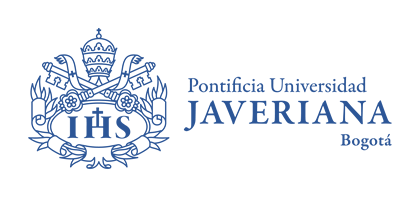

# Introducción a la IA - Proyecto

## Integrantes
- Andrés García Montoya
- Nicolás David Rincón Ballesteros
- Iván Darío Orozco

In [262]:
#!pip install -r requirements.txt

# Importar librerías

In [263]:
import pandas as pd                                                # Para manipulación de datos, CSV I/O (e.g. pd.read_csv).
import numpy as np                                                 # Para álgebra linear (Operaciones de matrices).
import tensorflow as tf                                             # Para construir y entrenar modelos de aprendizaje profundo.
from tensorflow import keras                                        # Para construir y entrenar modelos de aprendizaje profundo.
from tensorflow.keras import layers                                 # Para construir y entrenar modelos de aprendizaje profundo.
import matplotlib.pyplot as plt                                    # Para visualización de datos.
import seaborn as sns                                              # Para visualización de datos.
from ucimlrepo import fetch_ucirepo                                # Para obtener datasets de UCI Machine Learning Repository.
from sklearn.preprocessing import StandardScaler                   # Para normalizar los datos.
from sklearn.model_selection import train_test_split               # Para dividir los datos en conjuntos de entrenamiento y pruebas.
from sklearn.metrics import accuracy_score, classification_report   # Para evaluar el rendimiento del modelo.
from sklearn.linear_model import Perceptron                        # Para construir un modelo de perceptrón.

import pandas as pd                                                # Para manipulación de datos, CSV I/O (e.g. pd.read_csv).
import numpy as np                                                 # Para álgebra linear (Operaciones de matrices).
import tensorflow as tf                                             # Para construir y entrenar modelos de aprendizaje profundo.
from tensorflow import keras                                        # Para construir y entrenar modelos de aprendizaje profundo.
from tensorflow.keras import layers                                 # Para construir y entrenar modelos de aprendizaje profundo.
import matplotlib.pyplot as plt                                    # Para visualización de datos.
import seaborn as sns                                              # Para visualización de datos.
from ucimlrepo import fetch_ucirepo                                # Para obtener datasets de UCI Machine Learning Repository.
from sklearn.preprocessing import StandardScaler                   # Para normalizar los datos.
from sklearn.model_selection import train_test_split               # Para dividir los datos en conjuntos de entrenamiento y pruebas.
from sklearn.metrics import accuracy_score, classification_report   # Para evaluar el rendimiento del modelo.

# Paso 1: Cargar el dataset

In [264]:
# Se cargan los datos del dataset de vinos desde un archivo CSV.
df_wine = pd.read_csv('winequality.csv')
df_wine.head()

# **Paso 2: Comprensión del dataset**

In [265]:
# Información general del dataset
df_wine.info()

In [266]:
# Estadísticas descriptivas del dataset
df_wine.describe()

## Resumen

Wine Quality Dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 6497

    :Number of Attributes: 13 (12 numeric features and 1 target)

    :Attribute Information:
        - fixed_acidity
        - volatile_acidity
        - citric_acid
        - residual_sugar
        - chlorides
        - free_sulfur_dioxide
        - total_sulfur_dioxide
        - density
        - pH
        - sulphates
        - alcohol
        - quality (score between 0 and 10)
        - color (red or white)

    :Summary Statistics:

    ===================================== ======
                                           Min    Max
    ===================================== ====== ======
    fixed_acidity                          3.8    14.2
    volatile_acidity                       0.08   1.58
    citric_acid                            0.0    1.0
    residual_sugar                         0.6    65.8
    chlorides                              0.012  0.611
    free_sulfur_dioxide                    1.0    289.0
    total_sulfur_dioxide                   6.0    440.0
    density                                0.9901 1.0037
    pH                                     2.72   4.01
    sulphates                              0.22   2.0
    alcohol                                8.4    14.9
    quality                                3      9
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution:
        - Quality 0 to 6: 63 instances
        - Quality 6 to 9: 1319 instances

    :Creator: Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
    :Donor: Paulo Cortez (pcortez@ics.uminho.pt), Antonio Cerdeira, Fernando Almeida, Telmo Matos and José Reis (see also http://www3.dsi.uminho.pt/pcortez)

    :Date: March, 2009

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/Wine+Quality

.. topic:: References

   - P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
   - S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014.

## Análisis Gráfico

## Imprimimos las frecuencias de la variable objetivo

In [267]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df_wine, hue='quality', palette='viridis', dodge=False, legend=False)
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

## Imprimimos las distribuciones de las variables

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de visualización
sns.set(style="whitegrid")

# Variables seleccionadas
variables = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 
             'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Definir paleta de colores
palette = sns.color_palette("husl", len(variables))

# Histogramas para variables seleccionadas
fig, axs = plt.subplots(4, 3, figsize=(12, 15))

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    sns.histplot(df_wine[var], kde=True, ax=axs[row, col], color=palette[i])
    axs[row, col].set_title(f'Distribution of {var}')
    axs[row, col].set_xlabel(var.replace('_', ' ').title())
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Imprimimos la matriz de correlación de las variables

In [269]:
df_dummed = pd.get_dummies(df_wine, columns=['color'])
correlation_matrix = df_dummed.corr()

# Graficar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de las Correlaciones entre Variables')
plt.show()

# **Paso 3: pre procesamiento**

### Dumificación de variables categóricas

In [270]:
df_wine.head()

In [271]:
# Dumificación de la variable categórica 'color'
df_wine = pd.get_dummies(df_wine, columns=['color'])
df_wine.drop(columns='color_white', inplace=True)
df_wine.head()

### Tratamiento de valores nulos

In [272]:
# Verificar la existencia de valores nulos (no hay)
print(df_wine.isnull().sum())

No hay valores nulos en el dataset, por lo que no es necesario realizar el proceso de eliminación de valores nulos.

### Tratamiento de valores atípicos

In [273]:
# Se visualizan los datos para identificar los valores atípicos.
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_wine.columns[:-1][:12], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_wine, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [274]:
# Itera sobre cada columna (excepto la última)
for column in df_wine.columns[:-1][:12]:
    
    # Calcula el rango intercuartílico (IQR)
    Q1 = df_wine[column].quantile(0.25)
    Q3 = df_wine[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identifica los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_wine[(df_wine[column] < lower_bound) | (df_wine[column] > upper_bound)]

    # Elimina los valores atípicos de la columna
    df_wine = df_wine[(df_wine[column] >= lower_bound) & (df_wine[column] <= upper_bound)]

    print(f"Valores atípicos eliminados en la columna '{column}': {len(outliers)}")

In [275]:
# Se visualizan los datos después de eliminar los valores atípicos.
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_wine.columns[:-1][:12], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_wine, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

## Normalización de los Datos

In [276]:
# Normalización de las características
features = df_wine.drop('quality', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Crear un nuevo DataFrame con las características normalizadas
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['quality'] = df_wine['quality']
df_wine = df_scaled.dropna()

# Paso 4: Construcción del dataset

### Separación de variables dependientes e independientes

In [277]:
from keras.src.utils import to_categorical

y_data = df_wine['quality']
y_data = to_categorical(y_data)
X_data = df_wine.drop(columns=['quality'])

#  Dividir los datos en conjuntos de entrenamiento y pruebas (50% - 50%):
x_data_train1_scaled, x_data_test1_scaled, y_data_train1, y_data_test1 = train_test_split(X_data, y_data, test_size=0.5, random_state=2)
print(f'Proporción de entrenamiento 50%: {len(x_data_train1_scaled)} en entrenamiento  - Proporción de prueba 50%: {len(x_data_test1_scaled)} muestras en prueba')


#  Dividir los datos en conjuntos de entrenamiento y pruebas (60% - 40%):
x_data_train2_scaled, x_data_test2_scaled, y_data_train2, y_data_test2 = train_test_split(X_data, y_data, test_size=0.4, random_state=2)
print(f'Proporción de entrenamiento 60%: {len(x_data_train2_scaled)} en entrenamiento  - Proporción de prueba 40%: {len(x_data_test2_scaled)} muestras en prueba')


#  Dividir los datos en conjuntos de entrenamiento y pruebas (80% - 20%):
x_data_train3_scaled, x_data_test3_scaled, y_data_train3, y_data_test3 = train_test_split(X_data, y_data, test_size=0.2, random_state=2)
print(f'Proporción de entrenamiento 80%: {len(x_data_train3_scaled)} en entrenamiento - Proporción de prueba 20%: {len(x_data_test3_scaled)} muestras en prueba')

# **Paso 5: Elaboración del modelo**

## **Construcción del modelo**

### Modelo 1: Perceptrón

In [278]:
from keras import Sequential
from sklearn.linear_model import Perceptron
from keras.layers import Dense
def build_model_1():
    model = Sequential([Dense(units=y_data.shape[1], activation='sigmoid')])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.F1Score()])
    return model

### Modelo 2: Red neuronal con una capa oculta con un numero de neuronas igual al numero de entradas

In [280]:
def build_model_2():
    model = tf.keras.models.Sequential()
    n_neurons = df_wine.shape[1] - 1
    model.add(tf.keras.layers.Dense(units=n_neurons, activation='relu', use_bias=True))
    model.add(tf.keras.layers.Dense(units=y_data.shape[1], activation='sigmoid', use_bias=True))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.F1Score()])
    return model

### Modelo 3: Red neuronal con dos capas oculta con dos neuronas en cada capa oculta.

In [281]:
def build_model_3():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(units=2, activation='relu', use_bias=True))
    model.add(tf.keras.layers.Dense(units=2, activation='relu', use_bias=True))
    model.add(tf.keras.layers.Dense(units=y_data.shape[1], activation='sigmoid', use_bias=True))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.F1Score()])
    return model

## **Entrenamiento de los modelos**

### Modelo 1

In [282]:
model_1_1 = build_model_1()
history_1_1 = model_1_1.fit(x_data_train1_scaled, y_data_train1, epochs=20, batch_size=32, validation_data=(x_data_test1_scaled, y_data_test1))

In [283]:
model_1_2 = build_model_1()
history_1_2 = model_1_2.fit(x_data_train2_scaled, y_data_train2, epochs=20, batch_size=32, validation_data=(x_data_test2_scaled, y_data_test2))

In [284]:
model_1_3 = build_model_1()
history_1_3 = model_1_3.fit(x_data_train3_scaled, y_data_train3, epochs=20, batch_size=32, validation_data=(x_data_test3_scaled, y_data_test3))

### Modelo 2

In [285]:
model_2_1 = build_model_2()
history_2_1 = model_2_1.fit(x_data_train1_scaled, y_data_train1, epochs=20, batch_size=32, validation_data=(x_data_test1_scaled, y_data_test1))

In [286]:
model_2_2 = build_model_2()
history_2_2 = model_2_2.fit(x_data_train2_scaled, y_data_train2, epochs=20, batch_size=32, validation_data=(x_data_test2_scaled, y_data_test2))

In [287]:
model_2_3 = build_model_2()
history_2_3 = model_2_3.fit(x_data_train3_scaled, y_data_train3, epochs=20, batch_size=32, validation_data=(x_data_test3_scaled, y_data_test3))

### Modelo 3

In [288]:
model_3_1 = build_model_3()
history_3_1 = model_3_1.fit(x_data_train1_scaled, y_data_train1, epochs=20, batch_size=32, validation_data=(x_data_test1_scaled, y_data_test1))

In [289]:
model_3_2 = build_model_3()
history_3_2 = model_3_2.fit(x_data_train2_scaled, y_data_train2, epochs=20, batch_size=32, validation_data=(x_data_test2_scaled, y_data_test2))

In [290]:
model_3_3 = build_model_3()
history_3_3 = model_3_3.fit(x_data_train3_scaled, y_data_train3, epochs=20, batch_size=32, validation_data=(x_data_test3_scaled, y_data_test3))

## **Evaluación de los modelos**

In [291]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Solo necesitamos una fila con dos gráficos

    # Gráficos de la precisión
    axs[0].plot(history.history['accuracy'], label='Train Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title('Train & Validation Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Gráficos de la pérdida
    axs[1].plot(history.history['loss'], label='Train Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title('Train & Validation Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.tight_layout()  # Para ajustar el diseño y evitar que los gráficos se solapen
    plt.show()


In [292]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Función para calcular métricas y mostrar la matriz de confusión
def medir_rendimiento_del_modelo(model, X_test, y_test):
    # Obtener las predicciones del modelo
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_true, y_pred_classes)
    print("Matriz de Confusión:")
    print(cm)

    # Calcular las métricas de evaluación
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred_classes, average='macro', zero_division=0)  # Controla el comportamiento con zero_division
    f1 = f1_score(y_true, y_pred_classes, average='macro')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

### Rendimiento de proporciones del modelo #1 (Perceptrón)

In [293]:
plot_metrics(history_1_1)

In [294]:
medir_rendimiento_del_modelo(model_1_1, x_data_test1_scaled, y_data_test1)

In [295]:
plot_metrics(history_1_2)

In [296]:
medir_rendimiento_del_modelo(model_1_2, x_data_test2_scaled, y_data_test2)

In [297]:
plot_metrics(history_1_3)

In [298]:
medir_rendimiento_del_modelo(model_1_3, x_data_test3_scaled, y_data_test3)

### Rendimiento de proporciones del modelo #2 (Red neuronal con una capa oculta)

In [299]:
plot_metrics(history_2_1)

In [300]:
medir_rendimiento_del_modelo(model_2_1, x_data_test1_scaled, y_data_test1)

In [301]:
plot_metrics(history_2_2)

In [302]:
medir_rendimiento_del_modelo(model_2_2, x_data_test2_scaled, y_data_test2)

In [303]:
plot_metrics(history_2_3)

In [304]:
medir_rendimiento_del_modelo(model_2_3, x_data_test3_scaled, y_data_test3)

### Rendimiento de proporciones del modelo #3 (Red neuronal con dos capas ocultas)

In [305]:
plot_metrics(history_3_1)

In [306]:
medir_rendimiento_del_modelo(model_3_1, x_data_test1_scaled, y_data_test1)

In [307]:
plot_metrics(history_3_2)

In [308]:
medir_rendimiento_del_modelo(model_3_2, x_data_test2_scaled, y_data_test2)

In [309]:
plot_metrics(history_3_3)

In [310]:
medir_rendimiento_del_modelo(model_3_3, x_data_test3_scaled, y_data_test3)